# Wine and Food Pairing Prediction

In [350]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading The Dataset

In [351]:
df = pd.read_csv(r'C:\Users\Megha Nair\OneDrive\Desktop\projects to upload in github\Wine and Food Pairing\wine_food_pairings.csv')
df.head()

,wine_type,wine_category,food_item,food_category,cuisine,pairing_quality,quality_label,description
0,Syrah/Shiraz,Red,smoked sausage,Smoky BBQ,Spanish,2,Poor,Heuristic pairing assessment.
1,Grenache,Red,charcuterie board,Salty Snack,French,3,Neutral,Heuristic pairing assessment.
2,Madeira,Fortified,lemon tart,Dessert,French,4,Good,Acidic wine balances acidic food.
3,Cabernet Sauvignon,Red,roast lamb,Red Meat,Mexican,5,Excellent,Tannic red complements red meat fat.
4,Viognier,White,duck à l’orange,Poultry,Vietnamese,2,Poor,Heuristic pairing assessment.


## Analysis of Data

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34933 entries, 0 to 34932
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   wine_type        34933 non-null  object
 1   wine_category    34933 non-null  object
 2   food_item        34933 non-null  object
 3   food_category    34933 non-null  object
 4   cuisine          34933 non-null  object
 5   pairing_quality  34933 non-null  int64 
 6   quality_label    34933 non-null  object
 7   description      34933 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [353]:
df.isnull().sum()

wine_type          0
wine_category      0
food_item          0
food_category      0
cuisine            0
pairing_quality    0
quality_label      0
description        0
dtype: int64

In [354]:
df.duplicated().sum()

0

## Exploratory Data Analysis EDA

<Axes: xlabel='quality_label', ylabel='count'>

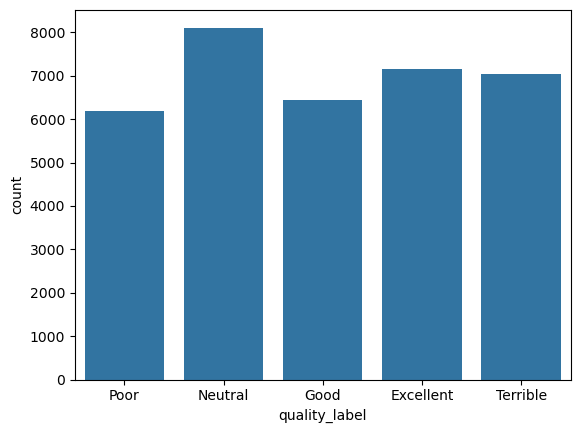

In [355]:
sns.countplot(x = 'quality_label', data = df)

In [356]:
df.columns

Index(['wine_type', 'wine_category', 'food_item', 'food_category', 'cuisine',
       'pairing_quality', 'quality_label', 'description'],
      dtype='object')

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34933 entries, 0 to 34932
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   wine_type        34933 non-null  object
 1   wine_category    34933 non-null  object
 2   food_item        34933 non-null  object
 3   food_category    34933 non-null  object
 4   cuisine          34933 non-null  object
 5   pairing_quality  34933 non-null  int64 
 6   quality_label    34933 non-null  object
 7   description      34933 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


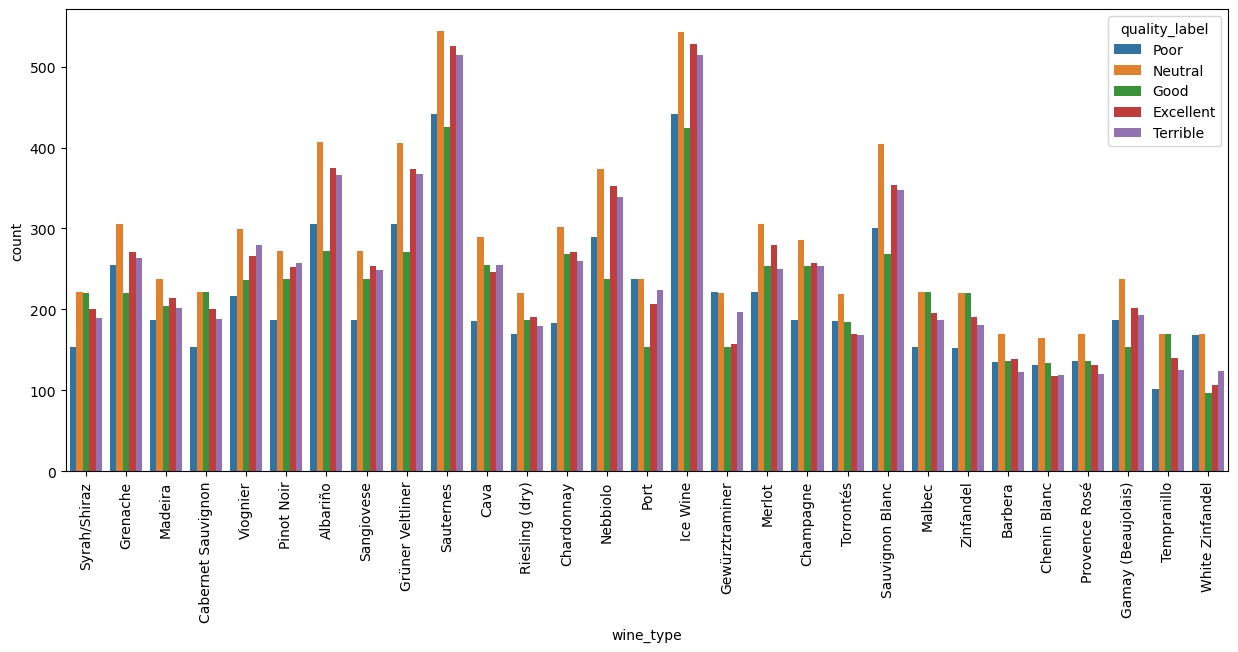

In [358]:
plt.figure(figsize=(15,6))
sns.countplot(x='wine_type', hue='quality_label', data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='wine_category', ylabel='count'>

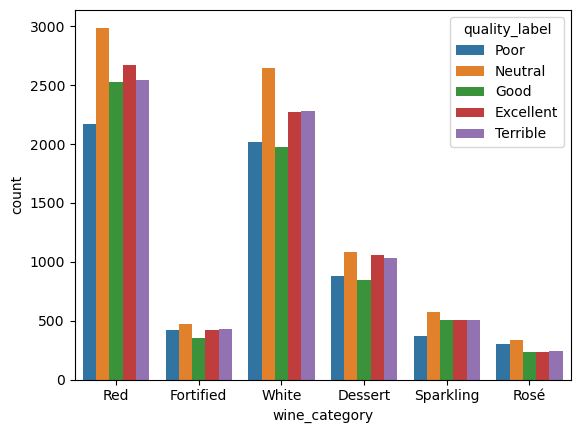

In [359]:
sns.countplot(x = 'wine_category', hue = 'quality_label', data = df)

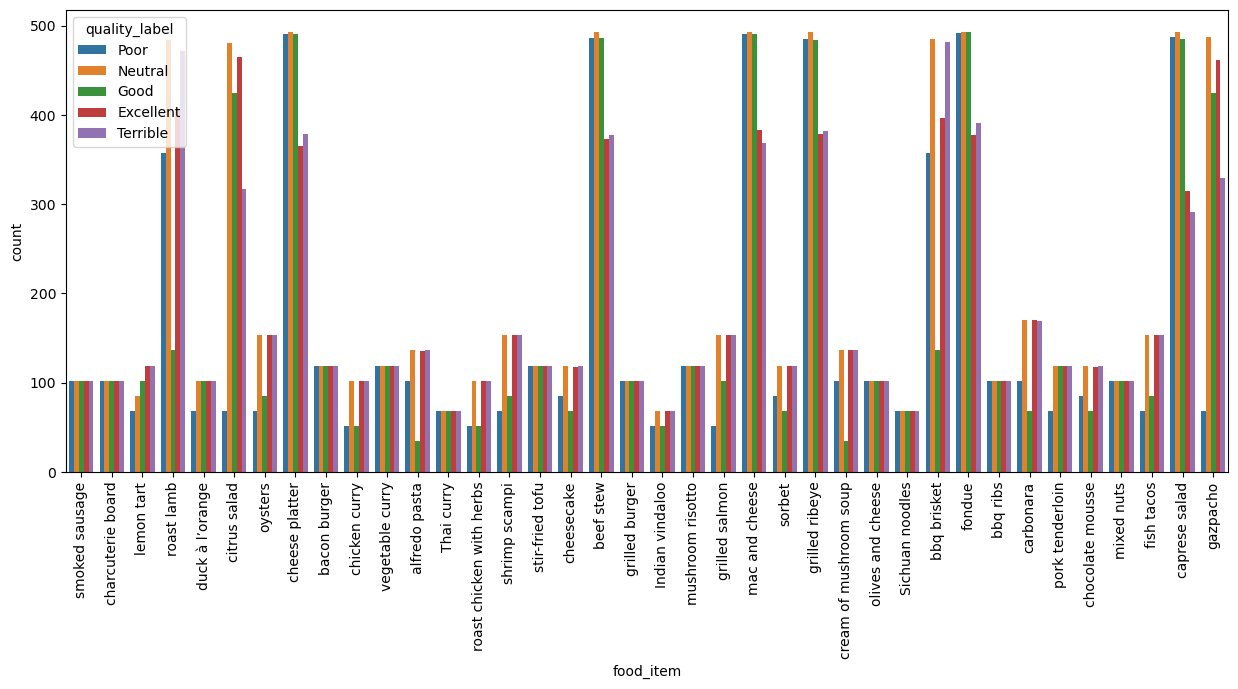

In [360]:
plt.figure(figsize = (15,6))
sns.countplot(x = 'food_item', hue = 'quality_label', data = df)
plt.xticks(rotation =90)
plt.show()

<Axes: xlabel='food_category', ylabel='count'>

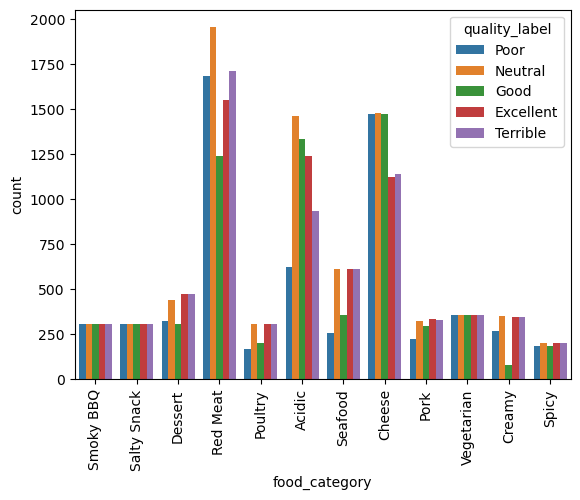

In [361]:
plt.xticks(rotation = 90)
sns.countplot(x = 'food_category', hue = 'quality_label', data = df)

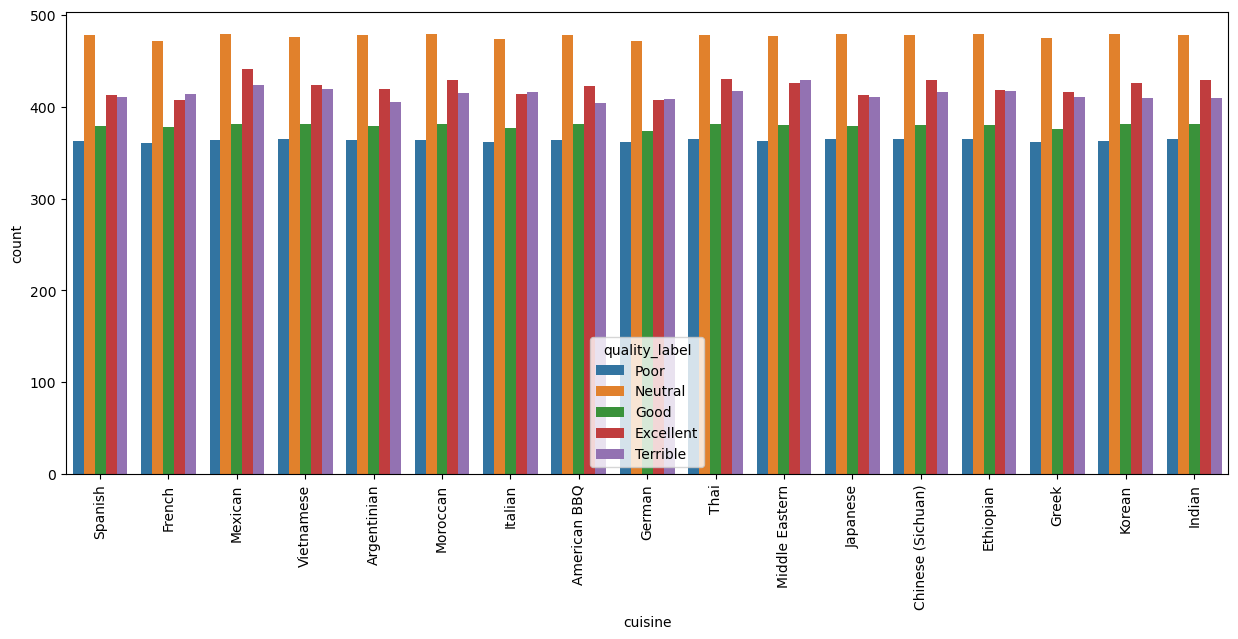

In [362]:
plt.figure(figsize = (15,6))
sns.countplot(x = 'cuisine', hue = 'quality_label', data = df)
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='quality_label', ylabel='pairing_quality'>

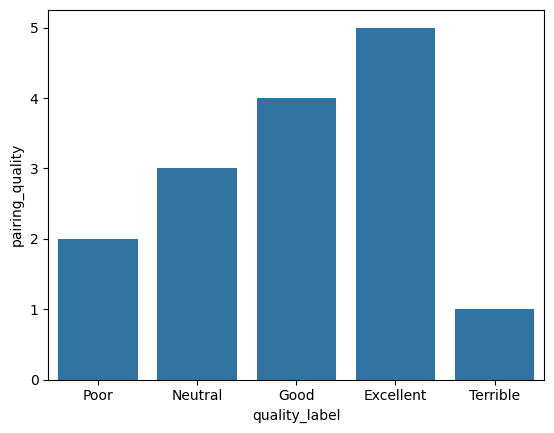

In [363]:
sns.barplot(y = 'pairing_quality', x = 'quality_label', data = df)

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34933 entries, 0 to 34932
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   wine_type        34933 non-null  object
 1   wine_category    34933 non-null  object
 2   food_item        34933 non-null  object
 3   food_category    34933 non-null  object
 4   cuisine          34933 non-null  object
 5   pairing_quality  34933 non-null  int64 
 6   quality_label    34933 non-null  object
 7   description      34933 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [365]:
df.drop('description', axis = 1, inplace = True)

In [366]:
df = pd.get_dummies(df, drop_first=True)

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34933 entries, 0 to 34932
Columns: 102 entries, pairing_quality to quality_label_Terrible
dtypes: bool(101), int64(1)
memory usage: 3.6 MB


## Modeling

In [369]:
final_res = []

In [370]:
X = df.drop('quality_label_Good', axis=1)  # or your main target column
y = df['quality_label_Good'] 

In [371]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
print(x_train.shape,x_test.shape,y_train.shape)

(27946, 5) (6987, 5) (27946,)


**Logistic Regression**

In [372]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [373]:
y_pred_LR = LR.predict(x_test)

In [374]:
from sklearn.metrics import accuracy_score

In [375]:
print('Logistic Regression :')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_LR))
acc_LR = accuracy_score(y_test, y_pred_LR)
final_res.append(acc_LR)

Logistic Regression :
Accuracy Score:  0.8102189781021898


**Decision Tree**

In [376]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [377]:
y_pred_DTC = DTC.predict(x_test)

In [378]:
print('Decision Tree :')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_DTC))
acc_DTC = accuracy_score(y_test, y_pred_DTC)
final_res.append(acc_DTC)

Decision Tree :
Accuracy Score:  0.7921854873336196


**Random Forest**

In [379]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [380]:
y_pred_RFC = RFC.predict(x_test)

In [381]:
print('Random Forest :')
print('Accuracy Score :',accuracy_score(y_test,y_pred_RFC))
acc_RFC = accuracy_score(y_test,y_pred_RFC)
final_res.append(acc_RFC)

Random Forest :
Accuracy Score : 0.7718620294833262


**K-Nearest Neighbors**

In [382]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [383]:
y_pred_KNN = KNN.predict(x_test)

In [384]:
print('K-Nearest Neighbors : ')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_KNN))
acc_KNN = accuracy_score(y_test, y_pred_KNN)
final_res.append(acc_KNN)

K-Nearest Neighbors : 
Accuracy Score:  0.7944754544153427


**XGBoost**

In [385]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [386]:
y_pred_XGB = XGB.predict(x_test)

In [387]:
print('XGBoost : ')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_XGB))
acc_XGB = accuracy_score(y_test, y_pred_XGB)
final_res.append(acc_XGB)

XGBoost : 
Accuracy Score:  0.8102189781021898


**GradientBoosting**

In [388]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [389]:
y_pred_GBC = GBC.predict(x_test)

In [390]:
print('GradientBoosting : ')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_GBC))
acc_GBC = accuracy_score(y_test, y_pred_GBC)
final_res.append(acc_GBC)

GradientBoosting : 
Accuracy Score:  0.8102189781021898


## Comparing Algorithm

Text(0.5, 1.0, 'Accuracy Score')

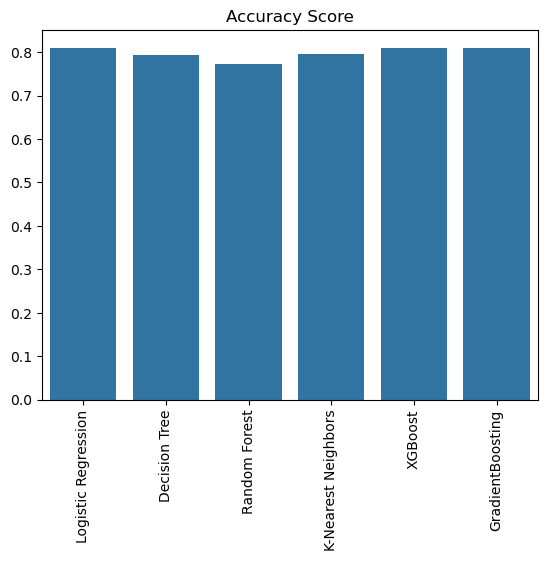

In [391]:
plt.xticks(rotation = 90)
sns.barplot(x = ['Logistic Regression','Decision Tree', 'Random Forest','K-Nearest Neighbors','XGBoost','GradientBoosting'], y = [accuracy_score(y_test, y_pred_LR), accuracy_score(y_test, y_pred_DTC), accuracy_score(y_test, y_pred_RFC), accuracy_score(y_test, y_pred_KNN), accuracy_score(y_test, y_pred_XGB), accuracy_score(y_test, y_pred_GBC)]).set_title('Accuracy Score')

In [392]:
final=np.array(final_res)
result=final.reshape(-1,1)
columns=['Accuracy']
index=['Logistic Regression','Decision Tree', 'Random Forest','K-Nearest Neighbors','XGBoost','GradientBoosting']
final_result=pd.DataFrame(result,index=index,columns=columns)
final_result.sort_values(by='Accuracy', ascending=False)

,Accuracy
Logistic Regression,0.810219
XGBoost,0.810219
GradientBoosting,0.810219
K-Nearest Neighbors,0.794475
Decision Tree,0.792185
Random Forest,0.771862


## Hyperparameter optimization

In [437]:
from sklearn.model_selection import RandomizedSearchCV

**XGBoost**

In [441]:
grid_XGB=XGBClassifier(reg_lambda= 0.1, reg_alpha= 0.1, n_estimators=50, max_depth=8, learning_rate=0.1, gamma=0)
grid_XGB.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.1, reg_lambda=0.1, ...)

In [443]:
y_pred_grid_XGB = grid_XGB.predict(x_test)

In [445]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred_grid_XGB))

Accuracy Score:  0.809646486331759


**Gradient Boosting**

In [447]:
grid_GB=GradientBoostingClassifier(n_estimators=65, max_depth=6, learning_rate=0.7)
grid_GB.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=6, n_estimators=65)

In [449]:
y_pred_grid_GB = grid_GB.predict(x_test)

In [451]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred_grid_GB))

Accuracy Score:  0.8042078145126664


## Conclusion
After the parameter tuning process with XGBoosting and GradientBoosting i will select Logistsic Regression as it gives the highest accuracy score of 81%.